In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import seaborn as sns
import zipfile
from sklearn import preprocessing

In [94]:
#importing train dataset
z_train = zipfile.ZipFile('train.csv.zip')
train = pd.read_csv(z_train.open('train.csv'))

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 67.0+ MB


All the entries for the train.csv are non-null values.
However, there might be NONE entries.

In [96]:
#importing test dataset
z_test = zipfile.ZipFile('test.csv.zip')
test = pd.read_csv(z_test.open('test.csv'))
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.0+ MB


All the entries for the test.csv are non-null values.

In [97]:
#importing map
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

ll_lon, ll_lat = -122.52469, 37.69862
ur_lon, ur_lat = -122.33663, 37.82986

In [98]:
#making list of data fields for test and train data
f_test = ['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
f = f_test + ['Category', 'Descript', 'Resolution']

In [99]:
train.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [100]:
print 'total no. of cases: ', len(train)
for field in f:
    if field in ['Id']:
        continue
    else:
        print 'no. of unique data in ' + field + ':', len(train[field].unique())

total no. of cases:  878049
no. of unique data in Dates: 389257
no. of unique data in DayOfWeek: 7
no. of unique data in PdDistrict: 10
no. of unique data in Address: 23228
no. of unique data in X: 34243
no. of unique data in Y: 34243
no. of unique data in Category: 39
no. of unique data in Descript: 879
no. of unique data in Resolution: 17


In [101]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [102]:
train['Resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'], dtype=object)

In [103]:
train['Descript'].unique()

array(['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO',
       'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'FOUND PROPERTY',
       'ROBBERY, ARMED WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'TRAFFIC VIOLATION',
       'ROBBERY, BODILY FORCE', 'STAY AWAY OR COURT ORDER, NON-DV RELATED',
       'LOST PROPERTY', 'ATTEMPTED THEFT FROM LOCKED VEHICLE',
       'CIVIL SIDEWALKS, CITATION', 'MALICIOUS MISCHIEF, VANDALISM',
       'SUSPICIOUS PACKAGE', 'AIDED CASE, MENTAL DISTURBED',
       'PETTY THEFT SHOPLIFTING', 'PROBATION VIOLATION',
       'STAY AWAY ORDER VIOLATION, DV RELATED',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED', 'STOLEN MOTORCYCLE',
       'GRAND THEFT FROM PERSON', 'BURGLARY, VEHICLE (ARREST MADE)',
       'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE',
       'PETTY THEFT FROM A B

In [112]:
 def extract_date(df):
    """
    function specifically for Dates field only
    creates new field 
    Year  YYYY
    Month MM
    Date  DD
    Time  HH:MM:SS
    """
    df['Year'] = df['Dates'].apply(lambda x: x[:4])
    df['Month'] = df['Dates'].apply(lambda x: x[5:7])
    df['Date'] = df['Dates'].apply(lambda x: x[8:10])
    df['Time'] = df['Dates'].apply(lambda x: x[-9:])
    return

def extract_time(df):
    """
    function specifically for Time field only
    creates new field 
    Hour   HH
    Minute MM
    Second SS
    """
    df['Hour'] = df['Time'].apply(lambda x: x[:3])
    df['Minute'] = df['Time'].apply(lambda x: x[4:6])
    df['Second'] = df['Time'].apply(lambda x: x[7:9])
    return

def make_binary_fields(df, field):
    """
    creates new field with field name as the name of data 
    if the original data match the new field name, the data will be 1
    if the original data does not match the new field name, the data will be 0

    
    ex 
    make_binary_field(df, 'DayOfWeek')
    will create new fields
    Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday
    where
    df['Monday'] will have value 1 for all Mondays and 0 for the rest
    """
    for new_field in df[field].unique():
        df[new_field] = df[field]
        df.loc[df[new_field] != new_field, new_field] = 0
        df.loc[df[new_field] == new_field, new_field] = 1
    return

In [114]:
extract_date (train)
extract_time (train)
make_binary_fields(train, 'DayOfWeek')
make_binary_fields(train, 'PdDistrict')
train.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year   ...    NORTHERN PARK INGLESIDE BAYVIEW  \
0 -122.425892  37.774599  2015   ...           1    0         0       0   
1 -122.425892  37.774599  2015   ...           1    0         0       0   
2 -122.424363  37.800414  2015   ...           1    0         0       0   
3 -122.426995  37.800873  2015   ...           1    0         0       0   
4 -122.438738  37.771541  2015   ...           0    1         0       0   

  RICHMOND CENTRAL TARAVAL TENDERLOIN MISSION SOUTHERN  
0        0       0       0          0       0        0  
1        0       0       0          0       0        0  
2        0       0       0          0       0        0  
3        0       0       0          0       0        0  
4        0       0       0          0       0        0  

[5 rows x 33 columns]

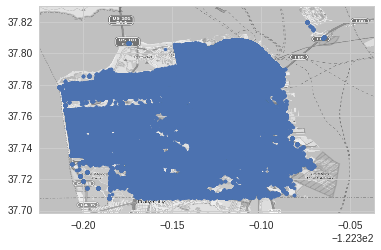

In [45]:
#cleaning data 
train['Xc'] = train[(train.X < ur_lon) & (train.X > ll_lon)].X
train['Yc'] = train[(train.Y < ur_lat) & (train.Y > ll_lat)].Y
train = train.dropna(subset = ['Xc', 'Yc'])

#plotting all datapoints
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[ll_lon, ur_lon, ll_lat, ur_lat], aspect=asp)
plt.plot(train['Xc'],train['Yc'],'.')
plt.axis([ll_lon, ur_lon, ll_lat, ur_lat])
plt.show()

In [53]:
def plot_on_map_by_fields(df, field):
    """
    function takes in dataframe(df) and the field
    and plots over the map after grouping by unique data in field
    """
    groups = df.groupby(field)
    i=1
    plt.figure(figsize=(30, 30))
    for name, group in groups:
        plt.subplot(8,5,i)
        histo, xedges, yedges = np.histogram2d(np.array(group.Xc),np.array(group.Yc), bins=(100, 100))
        myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
        plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[ll_lon, ur_lon, ll_lat, ur_lat], aspect=asp)
        plt.imshow(histo.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto',norm=LogNorm(), cmap = 'plasma')
        plt.title(name)
        i+=1
    return

In [61]:
"""
for field in f:
    if field in ['Id', 'Dates', 'Address', 'X', 'Y', 'Descript']:
        continue
    else:
        print 'Plot by ', field
        plot_on_map_by_fields(train, field)
"""

"\nfor field in f:\n    if field in ['Id', 'Dates', 'Address', 'X', 'Y', 'Descript']:\n        continue\n    else:\n        print 'Plot by ', field\n        plot_on_map_by_fields(train, field)\n"

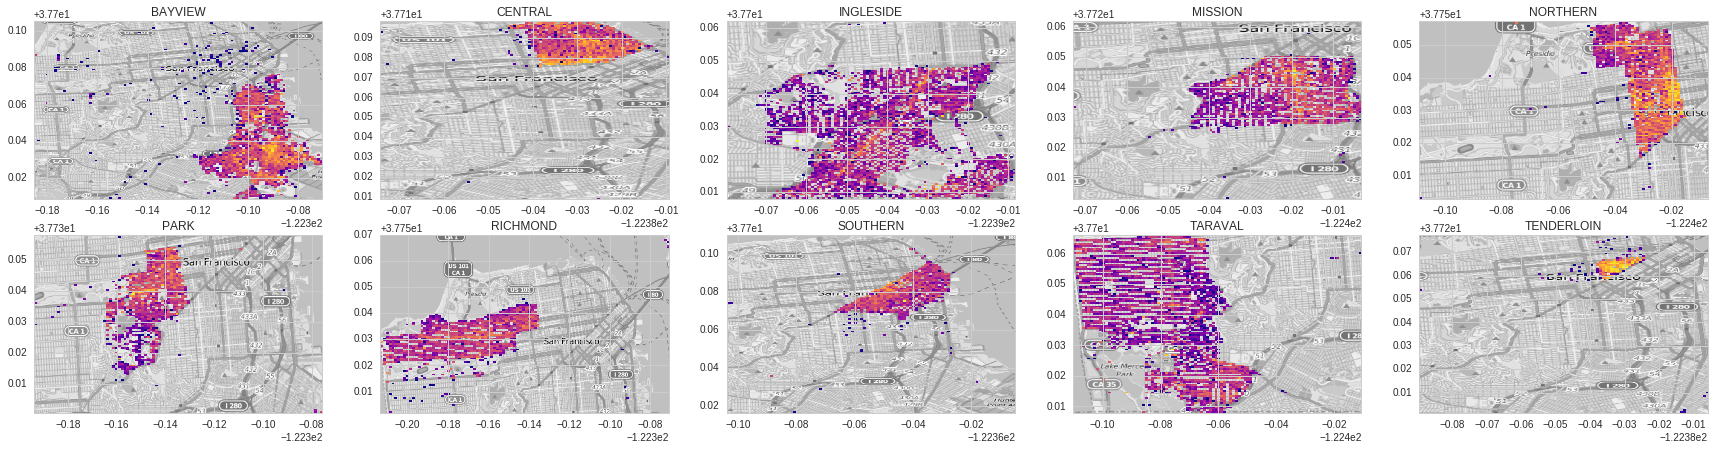

In [63]:
#to show that the function works
plot_on_map_by_fields(train, 'PdDistrict')

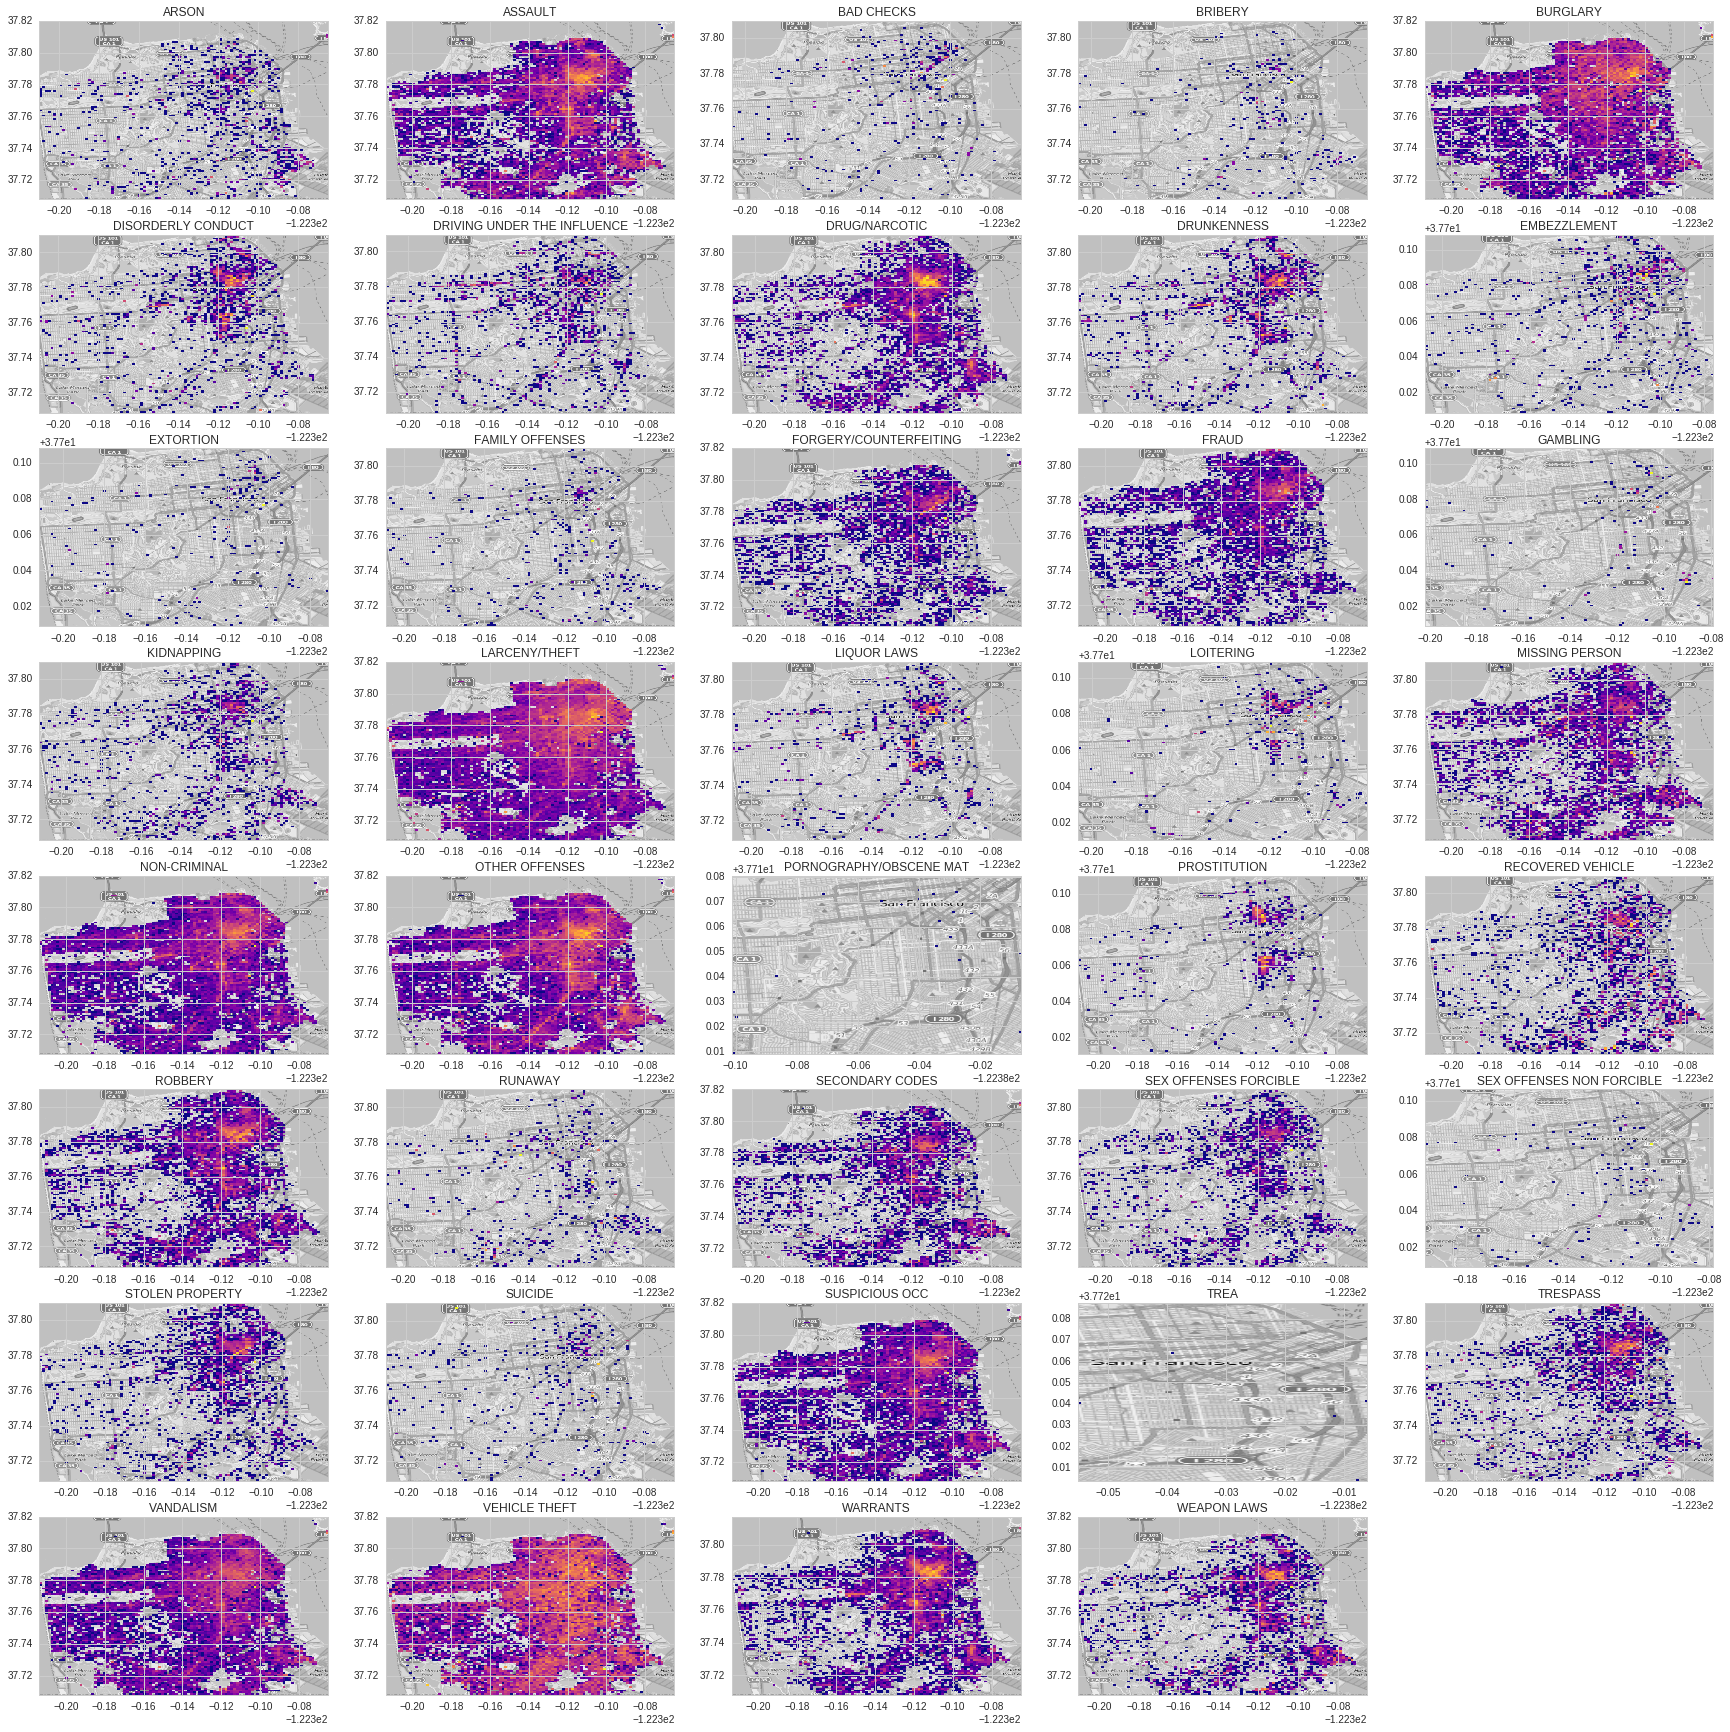

In [64]:
plot_on_map_by_fields(train, 'Category')

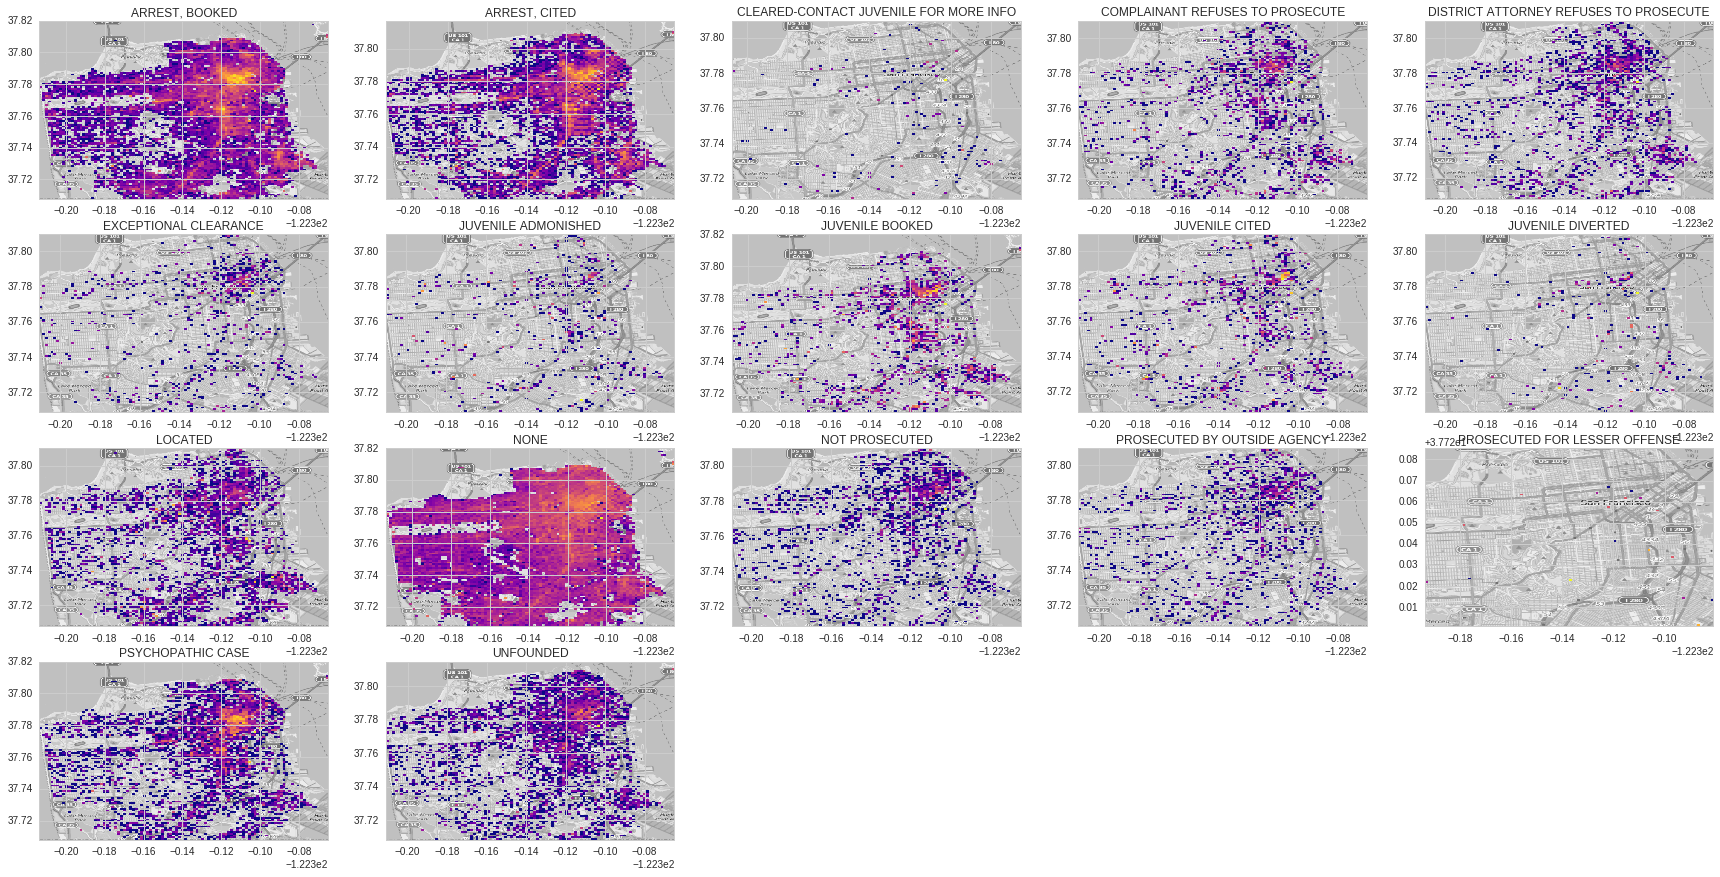

In [65]:
plot_on_map_by_fields(train, 'Resolution')

In [77]:
def plot_histogram(df, field):
    df[field].value_counts().plot(kind='bar', figsize=(8,10), title=('Number of Crimes by '+ field))
    return

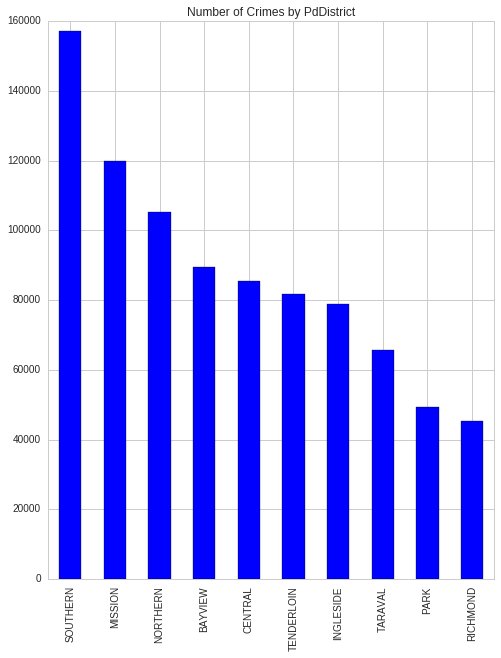

In [78]:
plot_histogram(train, 'PdDistrict')

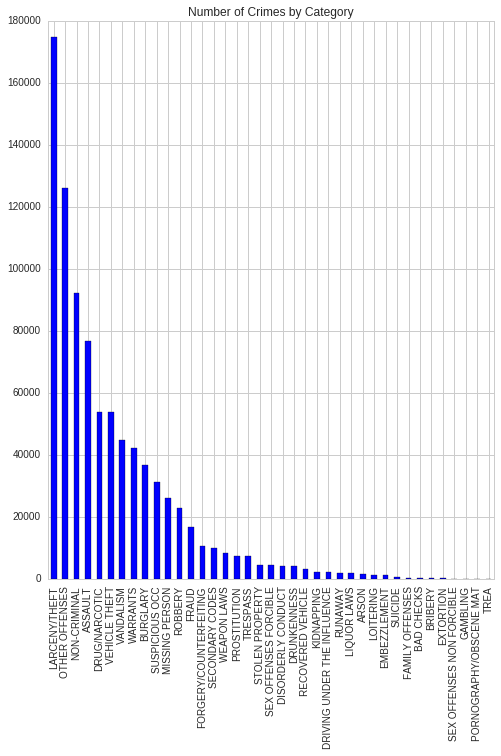

In [82]:
plot_histogram(train, 'Category')

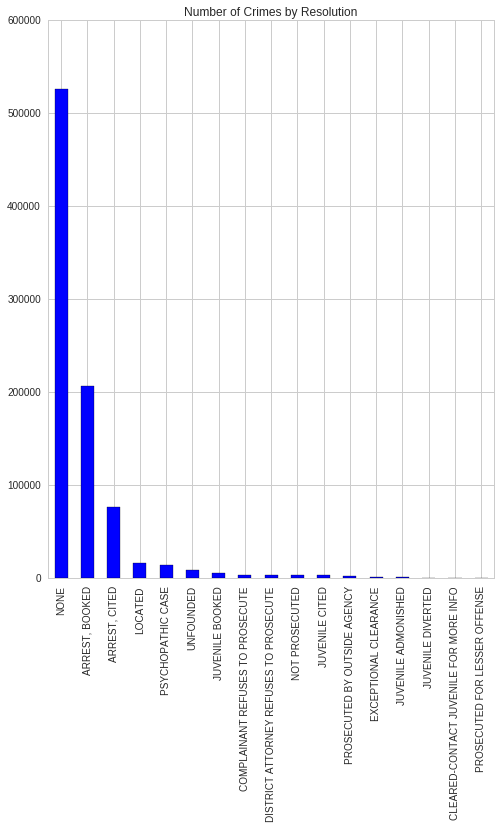

In [80]:
plot_histogram(train, 'Resolution')

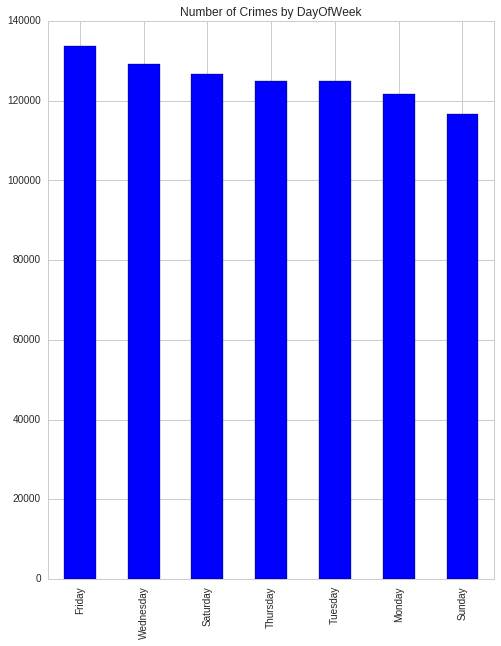

In [87]:
#plot_histogram(train, 'DayOfWeek')

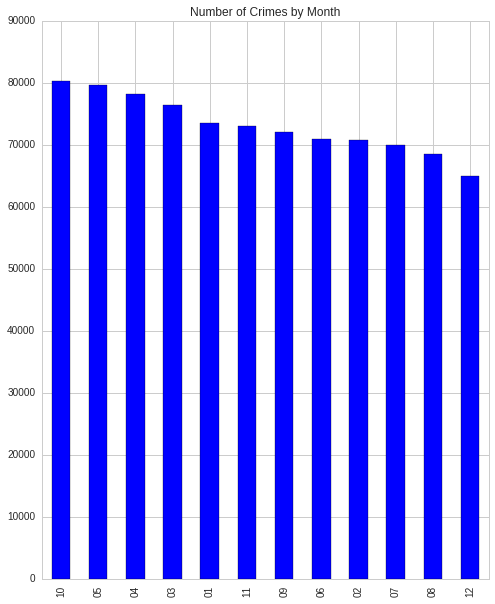

In [89]:
#plot_histogram(train, 'Month')

In [132]:
def plot_ordered_histogram(df, field):
    df['event']=1
    events = df[[field,'event']].groupby([field]).count().reset_index()
    events.plot(kind='bar', title=('Number of Crimes by '+ field))
    return

def plot_ordered_histogram2(df, field1, field2):
    """
    index: field1
    columns: field2
    """
    df['event']=1
    events = train[[field1, field2,'event']].groupby([field1, field2]).count().reset_index()
    events_pivot = events.pivot(index=field1, columns=field2, values='event').fillna(method='ffill')
    events_pivot.interpolate().plot(title=('number of cases by ' + field1 + ' & ' + field2), figsize=(15,10))

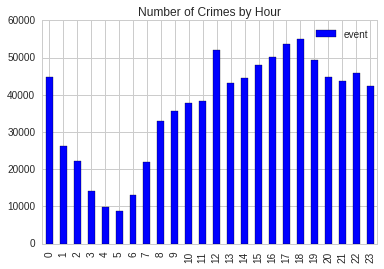

In [129]:
plot_ordered_histogram(train, 'Hour')

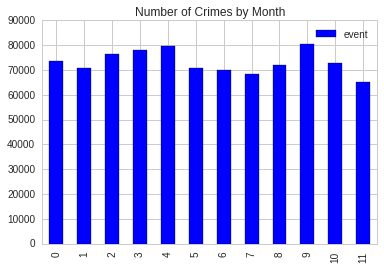

In [134]:
plot_ordered_histogram(train, 'Month')

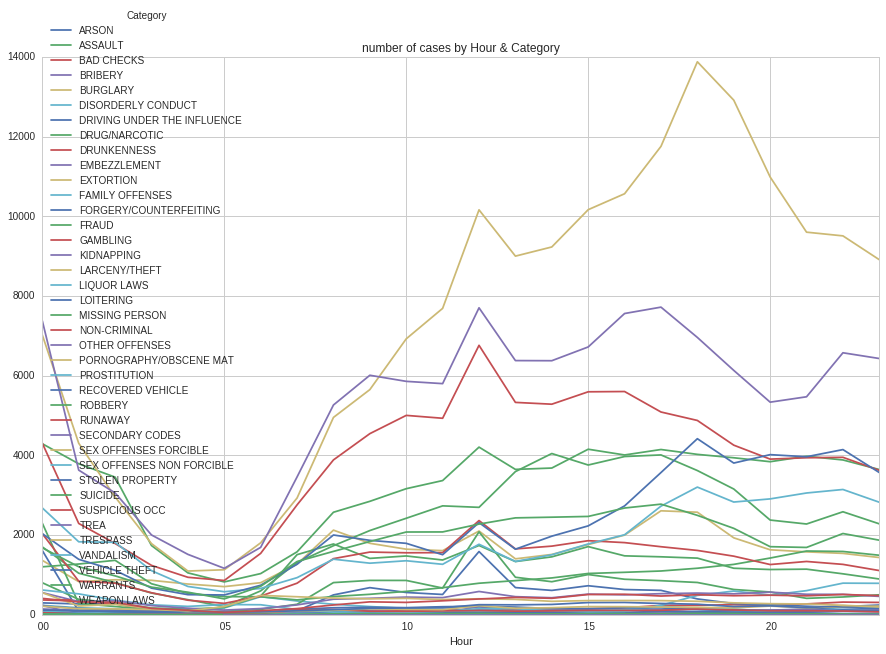

In [133]:
plot_ordered_histogram2(train, 'Hour', 'Category')

/home/jkim/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:53: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


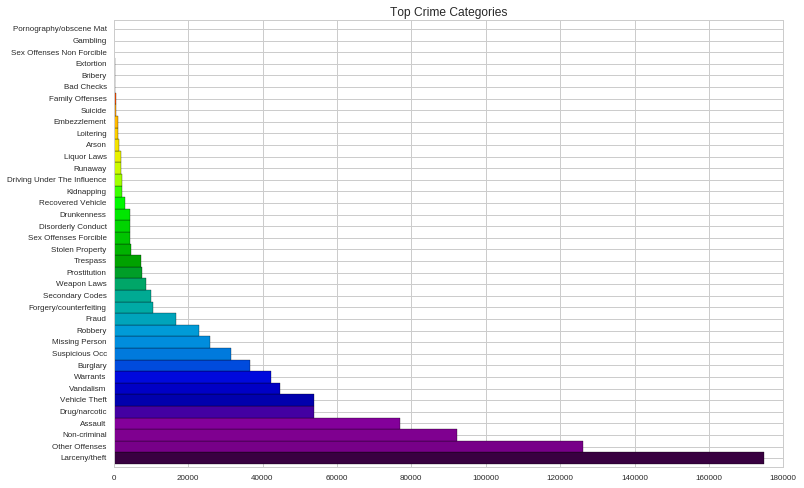

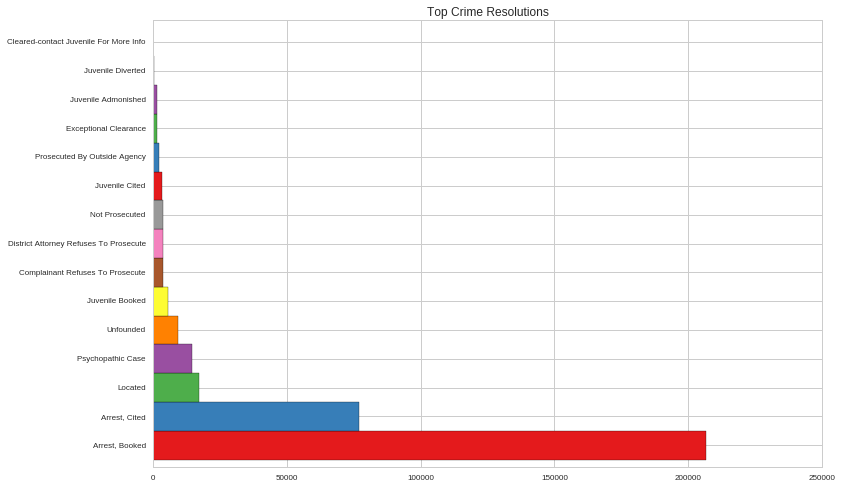

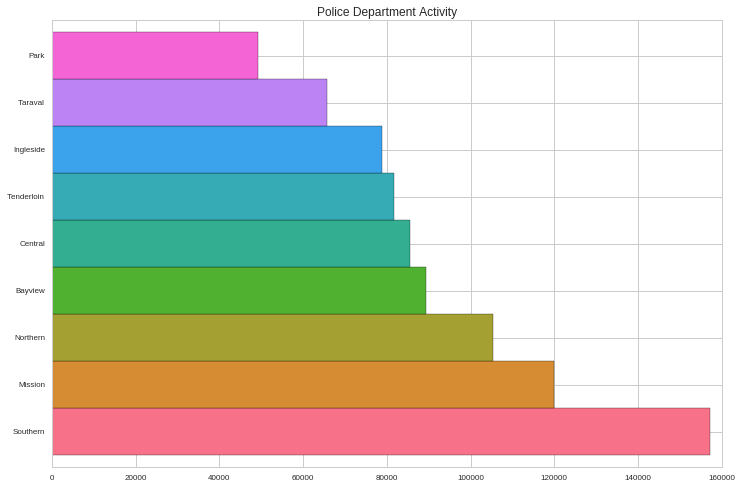

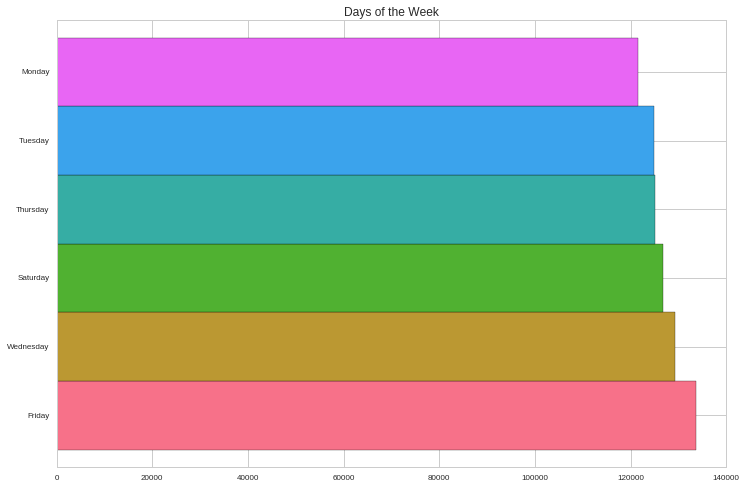

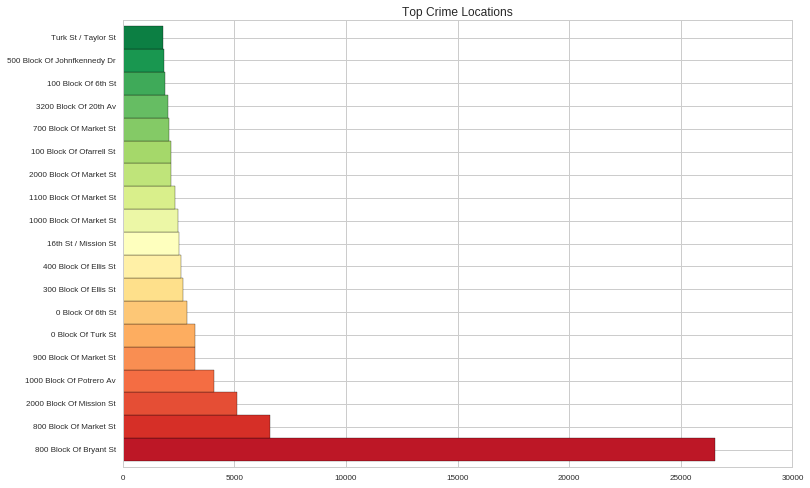

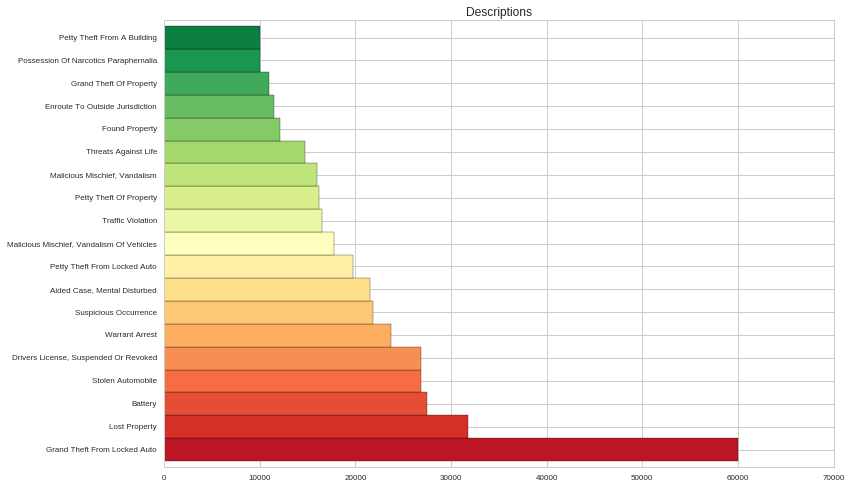

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [18]:
import os
import io
import sys
import codecs
import string
import operator

import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile    import ZipFile, is_zipfile
from contextlib import contextmanager

# Plotting Options
sns.set_style("whitegrid")
sns.despine()

def plot_bar(df, title, filename):
    """
    Helper function for plotting barplots.
    Color selection is made at random from a tuple of seabonrn colorsets
    """
    p = (
        'Set2', 'Paired', 'colorblind', 'husl',
        'Set1', 'coolwarm', 'RdYlGn', 'spectral'
    )
    color = sns.color_palette(np.random.choice(p), len(df))
    bar   = df.plot(kind='barh',
                    title=title,
                    fontsize=8,
                    figsize=(12,8),
                    stacked=False,
                    width=1,
                    color=color,
    )

    bar.figure.savefig(filename)

    plt.show()

def plot_top_crimes(df, column, title, fname, items=0):
    """
    Helper function for plotting seaborn plots
    """
    lower_case     = operator.methodcaller('lower')
    df.columns     = df.columns.map(lower_case)
    by_col         = df.groupby(column)
    col_freq       = by_col.size()
    col_freq.index = col_freq.index.map(string.capwords)

    col_freq.sort(ascending=True, inplace=True)

    plot_bar(col_freq[slice(-1, - items, -1)], title, fname)


def extract_csv(filepath):
    zp  = ZipFile(filepath)
    csv = [
        f for f in zp.namelist()
            if os.path.splitext(f)[-1] == '.csv'
    ]
    return zp.open(csv[0])

@contextmanager
def zip_csv_opener(filepath):
    """
    Context manager for opening zip files.

    Usage
    -----
    with zip_csv_opener(filepath) as fp:
        raw = fp.read()
    """
    fp = extract_csv(filepath) if is_zipfile(filepath) else open(filepath, 'rb')
    try:
        yield fp
    finally:
        fp.close()

def input_transformer(filepath):
    """
    Read file input and transform it into a pandas DataFrame
    """
    with zip_csv_opener(filepath) as fp:
        raw = fp.read()
        raw = raw.decode('utf-8')

    return pd.read_csv(io.StringIO(raw), parse_dates=True, index_col=0, na_values='NONE')

def main(filepath):
    """
    Script Entry Point
    """
    df = input_transformer(filepath)

    plot_top_crimes(df, 'category',   'Top Crime Categories',        'category.png')
    plot_top_crimes(df, 'resolution', 'Top Crime Resolutions',       'resolution.png')
    plot_top_crimes(df, 'pddistrict', 'Police Department Activity',  'police.png')
    plot_top_crimes(df, 'dayofweek',  'Days of the Week',            'weekly.png')
    plot_top_crimes(df, 'address',    'Top Crime Locations',         'location.png', items=20)
    plot_top_crimes(df, 'descript',   'Descriptions',                'descript.png', items=20)


if __name__ == '__main__':
    sys.exit(main('train.csv.zip'))


In [ ]:
"""This is an attempt to visualize both the temporal and spatial distributions of crimes"""

__author__='Lian L'
__version__='0.3'
__date__='23/07/2015'


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
train_data = pd.read_csv(z_train.open('train.csv'))


# We can first visualize the distribution of crimes over a day (by hours) in different months:
import re
def parse_date(date):
    mo=re.search(r'^([0-9]{4})-([0-9]{2})-[0-9]{2}\s+([0-9]{2}):[0-9]{2}:[0-9]{2}$',date)
    return map(int,(mo.group(1),mo.group(2),mo.group(3)))
# Extract 'Year', 'Month' and 'Hour' columns for later use
month_dict={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
train_data['Year'],train_data['Month'],train_data['Hour']=zip(*train_data.loc[:,'Dates'].map(parse_date))

data_month_hour=pd.crosstab(train_data['Hour'],train_data['Month'])
axhandles=data_month_hour.plot(kind='bar',subplots=True,layout=(4,3),figsize=(16,12),sharex=True,sharey=True,xticks=range(0,24,4),rot=0)
# Note here the subplots are based on columns, each column a new subplot
i=1
for axrow in axhandles:
    for ax in axrow:
        ax.set_xticklabels(range(0,24,4))
        ax.legend([month_dict[i]],loc='best')
        # Note here the argument has to be a list or a tuple, e.g. (month_dict[i],).
        # From Matplotlib official documentation: To make a legend for lines which already exist on the axes (via plot for instance),
        #    simply call this function with an ITERABLE of strings, one for each legend item.
        ax.set_title("")
        i+=1
plt.suptitle('Distribution of Crimes by Hour',size=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('Distribution_of_Crimes_by_Hour.png')


# We can also have a look at the distribution over days in a week
day_of_week=train_data['DayOfWeek'].value_counts()
day_of_week=day_of_week.reindex(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# Make the DataFrame or Series conform to the new index order
fig,ax=plt.subplots()
day_of_week.plot(kind='bar',ax=ax,title='Discribution of Crimes by Day in Week',rot=0)
fig.savefig('Distribution_of_Crimes_by_Day_in_Week.png')


# Next, let's explore the spatial distribution of crimes. We can create a simple crosstab table and look at the count distribution
# Let's try to look at the city-wide 10 most common crimes in SF and a breakdown by district

ten_most_common=train_data[train_data['Category'].isin(train_data['Category'].value_counts().head(10).index)]

ten_most_crime_by_district=pd.crosstab(ten_most_common['PdDistrict'],ten_most_common['Category'])
ten_most_crime_by_district.plot(kind='barh',figsize=(16,10),stacked=True,colormap='Greens',title='Disbribution of the City-wide Ten Most Common Crimes in Each District')
plt.savefig('Disbribution_of_the_City-wide_Ten_Most_Common_Crimes_in_Each_District.png')

# Now let's look at the crime trend by year for each district. We have three features: 'Year', 'Category' and 'PdDistrict'. For each 'PdDistrict' and 'Year', we would like to see the crime composition instead of simply counts, since data are incomplete for 2015
freq_by_d_c=pd.pivot_table(train_data[['PdDistrict','Category','Year','Dates']],values='Dates',columns=('Year'),index=('PdDistrict','Category'),aggfunc='count')
freq_by_d_c=freq_by_d_c.fillna(0).apply(lambda x: x/np.sum(x))
freq_by_d_c=freq_by_d_c.stack()
freq_by_d_c=freq_by_d_c.reset_index()
freq_by_d_c=freq_by_d_c.rename(columns={0:'Fraction'})
most_common=freq_by_d_c[freq_by_d_c['Category'].isin(train_data['Category'].value_counts().head(10).index)]

by_hour_for_months=sns.FacetGrid(most_common, hue='Category', col='PdDistrict', col_wrap=5, sharex=True, sharey=False, size=4,\
                        aspect=0.9, palette='rainbow')
by_hour_for_months=by_hour_for_months.map(plt.plot,'Year','Fraction').add_legend()
plt.savefig('Crime_Trend_in_Each_District.png')

# We want to create a scatterplot of crime occurences for the whole city
# Borrowing the map and information from Ben's script
SF_map= np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
asp = SF_map.shape[0] * 1.0 / SF_map.shape[1]
fig = plt.figure(figsize=(16,16))
plt.imshow(SF_map,cmap='gray',extent=lon_lat_box,aspect=1/asp)
ax=plt.gca()
# Discard some entries with erratic position coordinates
train_data[train_data['Y']<40].plot(x='X',y='Y',ax=ax,kind='scatter',marker='o',s=2,color='green',alpha=0.01)
ax.set_axis_off()

Credit to Ben Hammer, 
Map Source: open street map in ggmap R package